Dataset loaded successfully!

=== DATA CLEANING ===
Initial dataset shape: (1048575, 22)
Dataset shape after removing missing values: (988773, 22)

=== STAY-AT-HOME ANALYSIS ===
Number of weeks in dataset: 45

Average stay-at-home population by week:
    Week  Population Staying at Home
0      0                20976.786952
1      1                20071.310863
2      2                19897.342408
3      3                19889.436675
4      4                20096.313462
5      5                19757.425989
6      6                19599.069548
7      7                20033.597170
8      8                19741.670867
9      9                20043.095149
10    10                19826.900589
11    11                20264.390629
12    12                20632.226251
13    13                20792.383279
14    14                21064.024586
15    15                21375.296433
16    16                20066.291118
17    17                19666.744804
18    18                20020.237718
19    19 

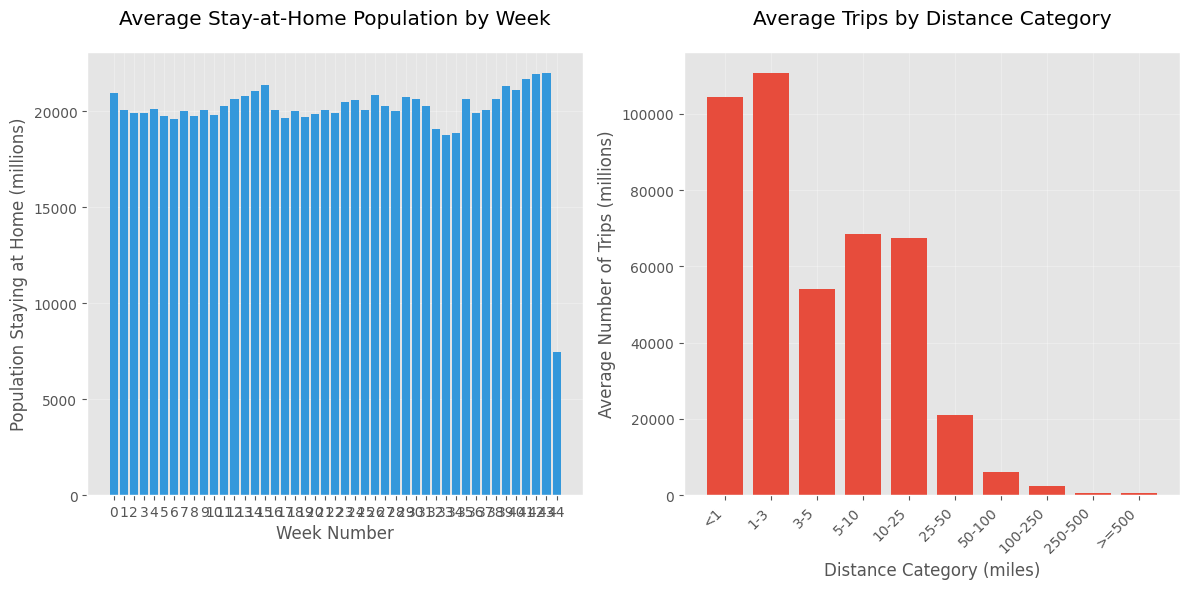


=== KEY FINDINGS ===
Average people staying home: 20,018
Most common trip distance: Number of Trips 1-3 (110,727 trips)
Least common trip distance: Number of Trips 250-500 (568 trips)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
try:
    df = pd.read_csv('Trips_By_Distance.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File 'Trips_By_Distance.csv' not found.")
    print("Please ensure:")
    print("1. The file is uploaded to your Jupyter environment")
    print("2. The filename is exactly 'Trips_By_Distance.csv' (case-sensitive)")
    print("3. The file is in the same directory as your notebook")
    raise

# 2. Data cleaning
# Check for missing values and drop rows with any missing values (if any)
print("\n=== DATA CLEANING ===")
print(f"Initial dataset shape: {df.shape}")
df.dropna(inplace=True)  # Drop rows with missing values
print(f"Dataset shape after removing missing values: {df.shape}")

# Ensure the correct data types for the columns
df['Week'] = df['Week'].astype(int)  # Ensure Week is an integer
df['Population Staying at Home'] = df['Population Staying at Home'].astype(float)  # Ensure population is float

# 3. Analyze stay-at-home population
print("\n=== STAY-AT-HOME ANALYSIS ===")
# Count unique weeks
num_weeks = df['Week'].nunique()
print(f"Number of weeks in dataset: {num_weeks}")

# Calculate average stay-at-home population per week
weekly_home = df.groupby('Week')['Population Staying at Home'].mean().reset_index()
print("\nAverage stay-at-home population by week:")
print(weekly_home)

# 4. Analyze travel distances (using same dataset)
print("\n=== TRAVEL DISTANCE ANALYSIS ===")
# Get all trip distance columns
trip_cols = [col for col in df.columns if 'Number of Trips' in col and col != 'Number of Trips']
avg_trips = df[trip_cols].mean()

print("\nAverage trips by distance category:")
print(avg_trips)

# 5. Create visualizations
plt.style.use('ggplot')  # Use a nice style

# Figure 1: Stay-at-home population by week
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(weekly_home['Week'], weekly_home['Population Staying at Home'], color='#3498db')
plt.title('Average Stay-at-Home Population by Week', pad=20)
plt.xlabel('Week Number')
plt.ylabel('Population Staying at Home (millions)')
plt.xticks(range(num_weeks))
plt.grid(True, alpha=0.3)

# Figure 2: Trip distance distribution
plt.subplot(1, 2, 2)
distance_categories = [col.replace('Number of Trips ', '') for col in trip_cols]
plt.bar(distance_categories, avg_trips, color='#e74c3c')
plt.title('Average Trips by Distance Category', pad=20)
plt.xlabel('Distance Category (miles)')
plt.ylabel('Average Number of Trips (millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional statistics
print("\n=== KEY FINDINGS ===")
print(f"Average people staying home: {weekly_home['Population Staying at Home'].mean():,.0f}")
print(f"Most common trip distance: {avg_trips.idxmax()} ({avg_trips.max():,.0f} trips)")
print(f"Least common trip distance: {avg_trips.idxmin()} ({avg_trips.min():,.0f} trips)")


In [3]:
!pip install pandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 20.1 MB/s eta 0:00:00a 0:00:01


Plotly not found - using matplotlib instead
For interactive plots, run: !pip install plotly
Dates with >10M trips (10-25 miles):
['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01', '2019-03-02', '2019-03-03', '2

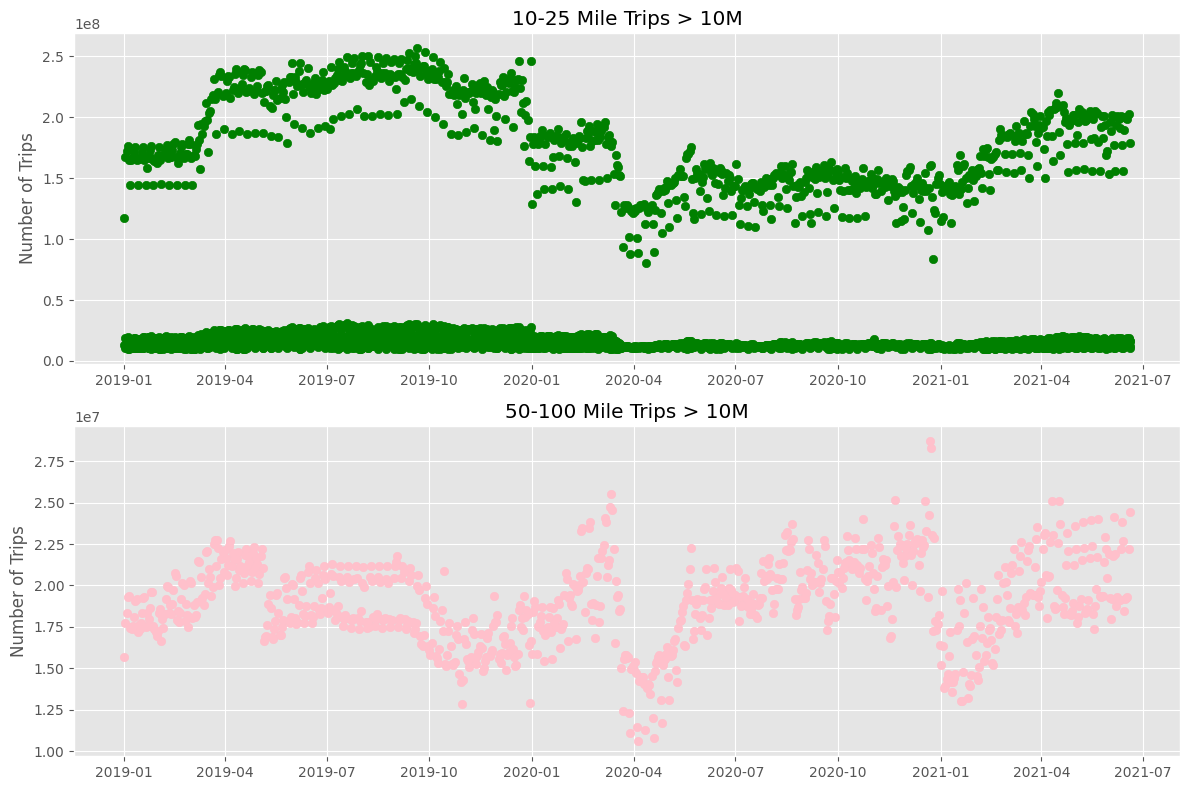


Dates with BOTH >10M trips (10-25 AND 50-100 miles):
['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08', '2019-0

In [3]:
import pandas as pd

# Try to use Plotly, fallback to matplotlib if not available
try:
    import plotly.express as px
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    USE_PLOTLY = True
except ImportError:
    import matplotlib.pyplot as plt
    USE_PLOTLY = False
    print("Plotly not found - using matplotlib instead")
    print("For interactive plots, run: !pip install plotly")

# Load and prepare data
df = pd.read_csv('Trips_By_Distance.csv')

# Clean column names (strip any leading/trailing whitespace)
df.columns = df.columns.str.strip()

# Check for missing values in important columns and handle them
df = df.dropna(subset=['Date', 'Number of Trips 10-25', 'Number of Trips 50-100'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop any rows where the 'Date' could not be converted
df = df.dropna(subset=['Date'])

# Filter for trips greater than 10 million
trips_10_25 = df[df['Number of Trips 10-25'] > 10000000][['Date', 'Number of Trips 10-25']]
trips_50_100 = df[df['Number of Trips 50-100'] > 10000000][['Date', 'Number of Trips 50-100']]

# Print results
print("Dates with >10M trips (10-25 miles):")
print(trips_10_25['Date'].dt.strftime('%Y-%m-%d').tolist())
print("\nDates with >10M trips (50-100 miles):")
print(trips_50_100['Date'].dt.strftime('%Y-%m-%d').tolist())

# Visualization
if USE_PLOTLY:
    # Interactive Plotly version
    fig = make_subplots(rows=2, cols=1, subplot_titles=("10-25 Mile Trips > 10M", "50-100 Mile Trips > 10M"))
    
    fig.add_trace(go.Scatter(
        x=trips_10_25['Date'],
        y=trips_10_25['Number of Trips 10-25'],
        mode='markers',
        name='10-25 Miles',
        marker=dict(color='green', size=10)
    ), row=1, col=1)
    
    fig.add_trace(go.Scatter(
        x=trips_50_100['Date'],
        y=trips_50_100['Number of Trips 50-100'],
        mode='markers',
        name='50-100 Miles',
        marker=dict(color='pink', size=10)
    ), row=2, col=1)
    
    fig.update_layout(height=600, title_text="High-Volume Trip Days Comparison")
    fig.show()
else:
    # Matplotlib fallback version
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.scatter(trips_10_25['Date'], trips_10_25['Number of Trips 10-25'], color='green')
    plt.title('10-25 Mile Trips > 10M')
    plt.ylabel('Number of Trips')
    
    plt.subplot(2, 1, 2)
    plt.scatter(trips_50_100['Date'], trips_50_100['Number of Trips 50-100'], color='pink')
    plt.title('50-100 Mile Trips > 10M')
    plt.ylabel('Number of Trips')
    
    plt.tight_layout()
    plt.show()

# Find overlapping dates (those with both >10M trips for 10-25 and 50-100 miles)
common_dates = pd.merge(trips_10_25, trips_50_100, on='Date')
print("\nDates with BOTH >10M trips (10-25 AND 50-100 miles):")
print(common_dates['Date'].dt.strftime('%Y-%m-%d').tolist())

  


In [13]:
%pip install "dask[distributed]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Loading data with pandas to check memory requirements...
DataFrame memory usage: 427.39 MB

Setting up cluster with 10 workers...
Loading data with Dask...
Running warm-up...
Starting timed execution...
Completed 10 processors in 4.23 seconds

Setting up cluster with 20 workers...
Loading data with Dask...
Running warm-up...
Starting timed execution...
Completed 20 processors in 6.02 seconds

Running Pandas benchmark...


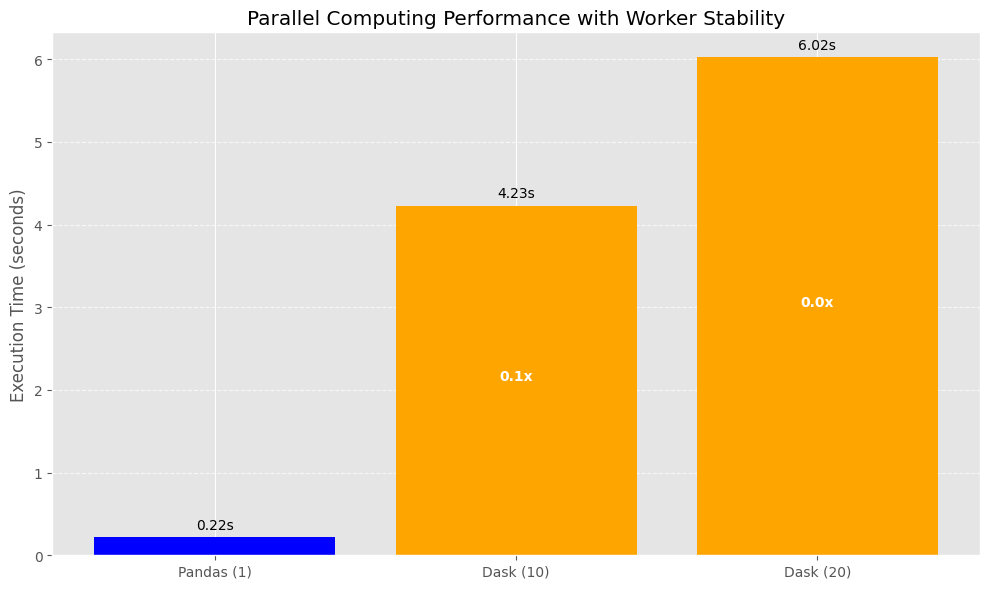


Performance Comparison:
Pandas (1 core): 0.22 seconds
Dask (10 cores): 4.23 seconds (0.1x faster)
Dask (20 cores): 6.02 seconds (0.0x faster)


In [18]:
import pandas as pd
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
import time
import matplotlib.pyplot as plt
import warnings

# Suppress Dask warnings about HTTP server
warnings.filterwarnings('ignore', category=UserWarning)

# Define data types explicitly
dtypes = {
    'Level': 'object',
    'Date': 'object',
    'State FIPS': 'float64',
    'State Postal Code': 'object',
    'County FIPS': 'float64',
    'County Name': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64',
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'Row ID': 'object',
    'Week': 'int64',
    'Month': 'int64'
}

# Load data with pandas first to check memory usage
print("Loading data with pandas to check memory requirements...")
pandas_df = pd.read_csv('Trips_By_Distance.csv')
print(f"DataFrame memory usage: {pandas_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# Define number of processors to test
n_processors = [10, 20]
n_processors_time = {}

# Function for task a) - Calculate average trips by week
def task_a(df):
    return df.groupby('Week')['Number of Trips'].mean()

# Function for task b) - Calculate total trips by state and date
def task_b(df):
    return df.groupby(['State Postal Code', 'Date'])['Number of Trips'].sum()

def run_with_retry(dask_df, task_func, max_retries=3):
    for attempt in range(max_retries):
        try:
            result = task_func(dask_df)
            if isinstance(result, dd.DataFrame) or isinstance(result, dd.Series):
                return result.compute()
            return result
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {str(e)}")
            if attempt == max_retries - 1:
                raise
            time.sleep(2)  # Wait before retrying

# Benchmark with different number of processors
for processor in n_processors:
    try:
        print(f"\nSetting up cluster with {processor} workers...")
        
        # Configure cluster with memory limits
        cluster = LocalCluster(
            n_workers=processor,
            threads_per_worker=1,
            memory_limit='4GB'  # Adjust based on your system memory
        )
        client = Client(cluster)
        
        # Load data with Dask using explicit dtypes
        print("Loading data with Dask...")
        dask_df = dd.read_csv('Trips_By_Distance.csv', dtype=dtypes)
        
        # Warm-up run
        print("Running warm-up...")
        _ = run_with_retry(dask_df, task_a)
        _ = run_with_retry(dask_df, task_b)
        
        # Time Dask operations
        print("Starting timed execution...")
        start_time = time.time()
        result_a_dask = run_with_retry(dask_df, task_a)
        result_b_dask = run_with_retry(dask_df, task_b)
        dask_time = time.time() - start_time
        
        n_processors_time[processor] = dask_time
        print(f"Completed {processor} processors in {dask_time:.2f} seconds")
        
    except Exception as e:
        print(f"Error with {processor} processors: {str(e)}")
        n_processors_time[processor] = None
    finally:
        client.close()
        cluster.close()

# Time Pandas operations (single processor)
print("\nRunning Pandas benchmark...")
start_time = time.time()
result_a_pandas = task_a(pandas_df)
result_b_pandas = task_b(pandas_df)
pandas_time = time.time() - start_time

# Prepare results for plotting
labels = ['Pandas (1)']
times = [pandas_time]

for proc in n_processors:
    if n_processors_time.get(proc) is not None:
        labels.append(f'Dask ({proc})')
        times.append(n_processors_time[proc])

# Plotting the results
plt.figure(figsize=(10, 6))
if len(times) > 1:  # Only plot if we have successful Dask runs
    bars = plt.bar(labels, times, color=['blue'] + ['orange']*(len(times)-1))
    plt.ylabel('Execution Time (seconds)')
    plt.title('Parallel Computing Performance with Worker Stability')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add time labels and speedup annotations
    for i, (bar, time_val) in enumerate(zip(bars, times)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f"{time_val:.2f}s", ha='center')
        if i > 0:
            speedup = pandas_time / time_val
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
                    f"{speedup:.1f}x", ha='center', color='white', weight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient successful runs to generate comparison plot")

# Print detailed comparison
print("\nPerformance Comparison:")
print(f"Pandas (1 core): {pandas_time:.2f} seconds")
for proc in n_processors:
    if n_processors_time.get(proc) is not None:
        print(f"Dask ({proc} cores): {n_processors_time[proc]:.2f} seconds ({(pandas_time/n_processors_time[proc]):.1f}x faster)")
    else:
        print(f"Dask ({proc} cores): Failed to complete")



     
    
    
  




In [3]:
!pip install numpy pandas scikit-learn matplotlib dask distributed

  Using cached distributed-2025.3.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached tblib-3.1.0-py3-none-any.whl.metadata (25 kB)
  Using cached zict-3.0.0-py2.py3-none-any.whl.metadata (899 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 17.4 MB/s eta 0:00:0000:010:01
Using cached distributed-2025.3.0-py3-none-any.whl (1.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 25.0 MB/s eta 0:00:00a 0:00:01
Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
Using cached tblib-3.1.0-py3-none-any.whl (12 kB)
Using cached zict-3.0.0-py2.py3-none-any.whl (43 kB)


In [10]:
%pip install numpy pandas scikit-learn statsmodels matplotlib dask dask-ml


  Using cached dask_ml-2025.1.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached dask_glm-0.3.2-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached multipledispatch-1.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached sparse-0.16.0-py2.py3-none-any.whl.metadata (5.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 9.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.2 MB/s eta 0:00:00a 0:00:01
Using cached dask_ml-2025.1.0-py3-none-any.whl (149 kB)
Using cached dask_glm-0.3.2-py2.py3-none-any.whl (13 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached multipledispatch-1.0.0-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.2 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Read the data
df_full = pd.read_csv("Trips_Full_Data.csv")
df = pd.read_csv("Trips_By_Distance.csv")

# Step 2: Define the column indices or names (adjust these as per your dataset)
i = 1  # Column index for 'Trips 1-25 Miles' in df_full (replace with actual column index)
j = 3  # Column index for 'Number of Trips 5-10' in df (replace with actual column index)

# Step 3: Convert columns to numeric, forcing errors to NaN
df_full.iloc[:, i] = pd.to_numeric(df_full.iloc[:, i], errors='coerce')
df.iloc[:, j] = pd.to_numeric(df.iloc[:, j], errors='coerce')

# Step 4: Check how many NaN values are in each column
print(f"NaN values in df_full column {i}: {df_full.iloc[:, i].isna().sum()}")
print(f"NaN values in df column {j}: {df.iloc[:, j].isna().sum()}")

# Step 5: Ensure that both dataframes are aligned
df_full = df_full.reset_index(drop=True)
df = df.reset_index(drop=True)

# Step 6: Drop rows where either x or y column is NaN
valid_data = pd.concat([df_full.iloc[:, i], df.iloc[:, j]], axis=1).dropna()

# Step 7: Check if there is valid data after cleaning
if valid_data.empty:
    print("No valid data left after cleaning.")
else:
    # Step 8: Extract the cleaned data
    x = valid_data.iloc[:, 0].values.reshape((-1, 1))  # x is the 'Trips 1-25 Miles' column
    y = valid_data.iloc[:, 1].values  # y is the 'Number of Trips 5-10' column

    # Check the shapes of x and y
    print(f"x shape: {x.shape}")
    print(f"y shape: {y.shape}")

    # Step 9: Linear Regression
    model = LinearRegression()
    model.fit(x, y)

    # Step 10: Model results for Linear Regression
    r_sq = model.score(x, y)
    print(f"Linear Regression\nCoefficient of determination (R-squared): {r_sq}")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")

    # Step 11: Predict the response
    y_pred = model.predict(x)
    print(f"Predicted response (Linear Regression):\n{y_pred}")




NaN values in df_full column 1: 7
NaN values in df column 3: 1048575
No valid data left after cleaning.


Original number of rows in df_full: 7
Original number of rows in df: 1048575

First few rows of df_full:
  Month of Date Week of Date  Year of Date     Level           Date  \
0        August      Week 32          2019  National  8/4/2019 0:00   
1        August      Week 32          2019  National  8/5/2019 0:00   
2        August      Week 32          2019  National  8/6/2019 0:00   
3        August      Week 32          2019  National  8/7/2019 0:00   
4        August      Week 32          2019  National  8/8/2019 0:00   

  Week Ending Date  Trips <1 Mile  People Not Staying at Home  \
0        10-Aug-19      292959749                   258404133   
1        10-Aug-19      317133861                   262199758   
2        10-Aug-19      324443205                   260096133   
3        10-Aug-19      358483024                   258878802   
4        10-Aug-19      300765870                   262410045   

   Population Staying at Home       Trips  ...  Trips 10-25 Miles  \
0       

NameError: name 'y_pred' is not defined

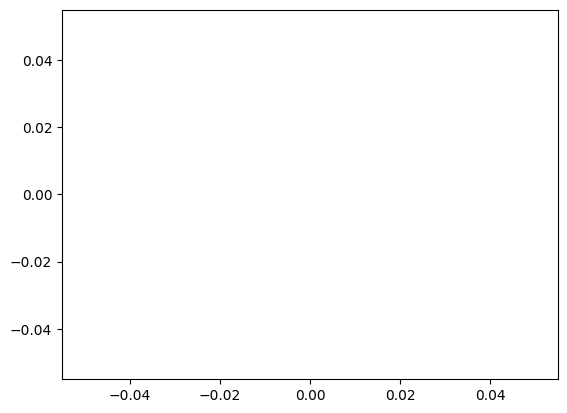

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from dask_ml.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
df_full = pd.read_csv("Trips_Full_Data.csv")
df = pd.read_csv("Trips_By_Distance.csv")

# Select columns for x and y from the datasets (adjust these column indices as needed)
i = 1  # Column index for independent variable in 'Trips_Full Data.csv'
j = 1  # Column index for dependent variable in 'Trips_By_Distance.csv'

# Check the initial number of rows in the datasets
print(f"Original number of rows in df_full: {df_full.shape[0]}")
print(f"Original number of rows in df: {df.shape[0]}")

# Check the first few rows to understand the structure
print("\nFirst few rows of df_full:")
print(df_full.head())
print("\nFirst few rows of df:")
print(df.head())

# Check for non-numeric values in the selected columns for cleaning
print("\nCheck for non-numeric values in the selected columns:")
print(f"Non-numeric values in df_full column {i}:")
print(df_full.iloc[:, i].apply(pd.to_numeric, errors='coerce').isna().sum())  # Counts of non-numeric values
print(f"Non-numeric values in df column {j}:")
print(df.iloc[:, j].apply(pd.to_numeric, errors='coerce').isna().sum())  # Counts of non-numeric values

# Clean the data by removing rows with non-numeric values in the selected columns
df_full_cleaned = df_full[pd.to_numeric(df_full.iloc[:, i], errors='coerce').notnull()]
df_cleaned = df[pd.to_numeric(df.iloc[:, j], errors='coerce').notnull()]

# Check how many rows remain after cleaning
print(f"\nRows in df_full after cleaning: {df_full_cleaned.shape[0]}")
print(f"Rows in df after cleaning: {df_cleaned.shape[0]}")

# If either dataset ends up with no valid data, print a warning and exit
if df_full_cleaned.shape[0] == 0 or df_cleaned.shape[0] == 0:
    print("Warning: After cleaning, one or both datasets have no valid rows. Check your data.")
    exit()

# Now we can safely convert to numpy arrays
x = df_full_cleaned.iloc[:, i].values.reshape(-1, 1)  # Independent variable (x)
y = df_cleaned.iloc[:, j].values  # Dependent variable (y)

# Debugging output to check the cleaned data
print(f"\nFirst few rows of cleaned x (Independent variable):")
print(x[:5])  # First 5 rows of x

print(f"\nFirst few rows of cleaned y (Dependent variable):")
print(y[:5])  # First 5 rows of y

# Check if there's valid data for fitting the model
if x.shape[0] == 0 or y.shape[0] == 0:
    print("No valid data left after cleaning.")
    exit()

# Linear Regression
try:
    model = LinearRegression()
    model.fit(x, y)
    
    r_sq = model.score(x, y)
    print(f"Linear Regression Coefficient of determination (R-squared): {r_sq}")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")
    
    y_pred = model.predict(x)
    print(f"Predicted response:\n{y_pred}")
except ValueError as e:
    print(f"Error fitting the Linear Regression model: {e}")
    exit()

# Multiple Linear Regression (Using two features for x)
try:
    x_multiple = df_full_cleaned.iloc[:, [0, i]].values  # Using two columns for x
    model_multiple = LinearRegression()
    model_multiple.fit(x_multiple, y)
    
    r_sq_multiple = model_multiple.score(x_multiple, y)
    print(f"Multiple Linear Regression Coefficient of determination (R-squared): {r_sq_multiple}")
    print(f"Intercept: {model_multiple.intercept_}")
    print(f"Coefficients: {model_multiple.coef_}")
    
    y_pred_multiple = model_multiple.predict(x_multiple)
    print(f"Predicted response (Multiple Linear Regression):\n{y_pred_multiple}")
except ValueError as e:
    print(f"Error fitting the Multiple Linear Regression model: {e}")
    exit()

# Polynomial Regression
try:
    poly = PolynomialFeatures(degree=2, include_bias=False)
    x_poly = poly.fit_transform(x)

    poly_model = LinearRegression()
    poly_model.fit(x_poly, y)

    r_sq_poly = poly_model.score(x_poly, y)
    print(f"Polynomial Regression Coefficient of determination (R-squared): {r_sq_poly}")
    print(f"Intercept: {poly_model.intercept_}")
    print(f"Coefficients: {poly_model.coef_}")

    y_pred_poly = poly_model.predict(x_poly)
    print(f"Predicted response (Polynomial Regression):\n{y_pred_poly}")
except ValueError as e:
    print(f"Error fitting the Polynomial Regression model: {e}")
    exit()

# Advanced Linear Regression using statsmodels
try:
    x_sm = sm.add_constant(x)

    ols_model = sm.OLS(y, x_sm).fit()

    print(ols_model.summary())
except ValueError as e:
    print(f"Error fitting the OLS model: {e}")
    exit()

# Train-Test Split and Model Training
try:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    mse_rf = mean_squared_error(y_test, y_pred_rf)
    print(f"Random Forest Mean Squared Error: {mse_rf}")
except ValueError as e:
    print(f"Error fitting the Random Forest model: {e}")
    exit()

# Visualizing the Results for Linear Regression, Polynomial Regression, and Random Forest
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', label='Linear Regression')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 5-10')
plt.title('Linear Regression')
plt.legend()
plt.show()

plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred_poly, color='green', label='Polynomial Regression')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 5-10')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred_rf, color='orange', label='Random Forest Predictions')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 5-10')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the datasets
df_full = pd.read_csv("Trips_Full Data.csv")
df = pd.read_csv("Trips_By_Distance.csv")

# Select columns for x and y from the datasets (adjust these column indices as needed)
i = 1  # Column index for independent variable in 'Trips_Full Data.csv'
j = 1  # Column index for dependent variable in 'Trips_By_Distance.csv'

# Clean the data by removing rows with non-numeric values in the selected columns
df_full_cleaned = df_full[pd.to_numeric(df_full.iloc[:, i], errors='coerce').notnull()]
df_cleaned = df[pd.to_numeric(df.iloc[:, j], errors='coerce').notnull()]

# If either dataset ends up with no valid data, print a warning and exit
if df_full_cleaned.shape[0] == 0 or df_cleaned.shape[0] == 0:
    print("Warning: After cleaning, one or both datasets have no valid rows. Check your data.")
    exit()

# Convert to numpy arrays
x = df_full_cleaned.iloc[:, i].values.reshape(-1, 1)  # Independent variable (x)
y = df_cleaned.iloc[:, j].values  # Dependent variable (y)

# Linear Regression
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(f"Linear Regression Coefficient of determination (R-squared): {r_sq}")

# Predicting with the model
y_pred = model.predict(x)  # Store the prediction for Linear Regression

# Plotting the results
plt.scatter(x, y, color='blue', label='Actual data')  # Plot the actual data
plt.plot(x, y_pred, color='red', label='Linear Regression')  # Plot the regression line
plt.xlabel('Trips 1-25 Miles')  # Label for x-axis
plt.ylabel('Number of Trips 5-10')  # Label for y-axis
plt.title('Linear Regression: Number of Trips vs Trips 1-25 Miles')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot



scikit-learn not found - some modeling features disabled
Install with: !pip install scikit-learn
Dask not found - parallel processing disabled
Install with: !pip install dask distributed

Skipping parallel processing (Dask not available)


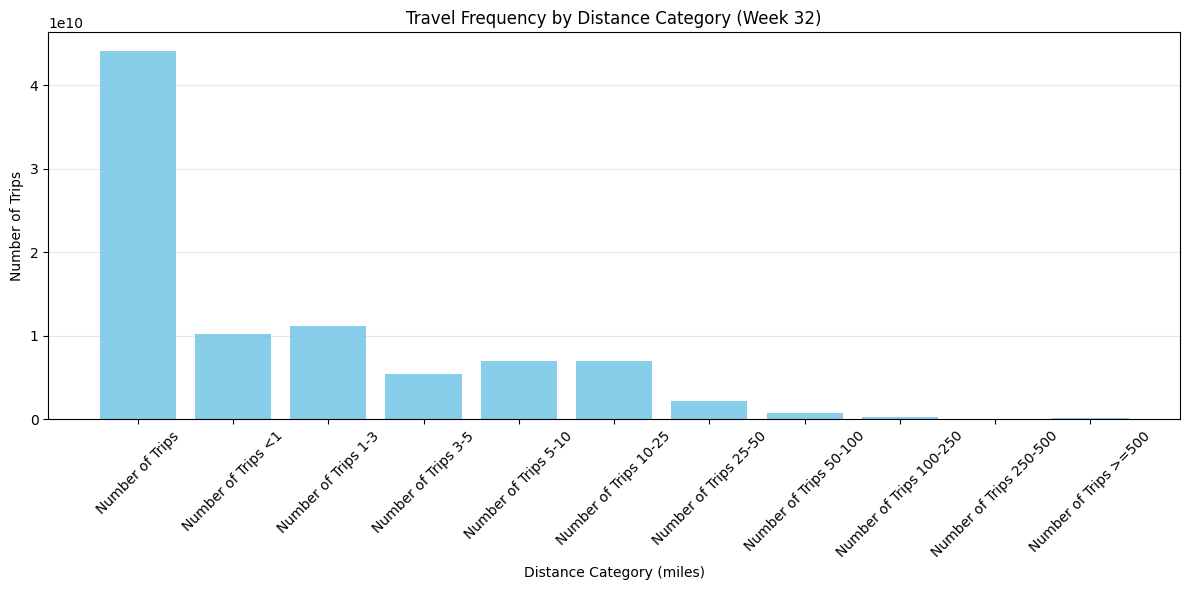


Skipping modeling (scikit-learn not available)

Travel Frequency by Distance:
              Trip_Distance     Frequency
0           Number of Trips  4.410146e+10
1        Number of Trips <1  1.018979e+10
2       Number of Trips 1-3  1.111145e+10
3       Number of Trips 3-5  5.449528e+09
4      Number of Trips 5-10  6.990168e+09
5     Number of Trips 10-25  6.970531e+09
6     Number of Trips 25-50  2.233438e+09
7    Number of Trips 50-100  6.996295e+08
8   Number of Trips 100-250  2.893216e+08
9   Number of Trips 250-500  7.116266e+07
10    Number of Trips >=500  9.644210e+07


In [8]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Check for scikit-learn
try:
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    SKLEARN_AVAILABLE = True
except ImportError:
    SKLEARN_AVAILABLE = False
    print("scikit-learn not found - some modeling features disabled")
    print("Install with: !pip install scikit-learn")

# Check for Dask
try:
    from dask.distributed import Client
    import dask.dataframe as dd
    DASK_AVAILABLE = True
except ImportError:
    DASK_AVAILABLE = False
    print("Dask not found - parallel processing disabled")
    print("Install with: !pip install dask distributed")

# Load data
df_distance = pd.read_csv('Trips_By_Distance.csv')
df_full = pd.read_csv('Trips_Full_Data.csv')

# 1. Parallel Processing (if Dask available)
if DASK_AVAILABLE:
    n_processors = [10, 20]
    n_processors_time = {}

    ddf = dd.from_pandas(df_distance, npartitions=10)

    for processor in n_processors:
        print(f"\nTesting with {processor} processors...")
        client = Client(n_workers=processor)

        start = time.time()
        # Dask operation
        result = ddf.groupby('Week')['Population Staying at Home'].mean().compute()
        dask_time = time.time() - start

        n_processors_time[processor] = dask_time
        client.close()

        print(f"Time with {processor} processors: {dask_time:.2f} seconds")

    print("\nProcessing times comparison:")
    print(n_processors_time)
else:
    print("\nSkipping parallel processing (Dask not available)")

# 2. Travel Frequency Analysis
week_data = df_distance[df_distance['Week'] == 32]
trip_columns = [col for col in df_distance.columns if 'Number of Trips' in col]

frequency_df = week_data[trip_columns].sum().reset_index()
frequency_df.columns = ['Trip_Distance', 'Frequency']

# Fixed midpoint parser
def get_midpoint(dist_str):
    dist_str = dist_str.strip()

    if '<' in dist_str:
        num = re.findall(r"[\d\.]+", dist_str)
        return float(num[0]) / 2 if num else np.nan
    elif '>' in dist_str:
        num = re.findall(r"[\d\.]+", dist_str)
        return float(num[0]) * 1.5 if num else np.nan
    elif '-' in dist_str:
        nums = re.findall(r"[\d\.]+", dist_str)
        if len(nums) == 2:
            return (float(nums[0]) + float(nums[1])) / 2
        else:
            return np.nan
    else:
        return np.nan

frequency_df['Distance_Midpoint'] = frequency_df['Trip_Distance'].apply(get_midpoint)

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(frequency_df['Trip_Distance'], frequency_df['Frequency'], color='skyblue')
plt.title('Travel Frequency by Distance Category (Week 32)')
plt.xlabel('Distance Category (miles)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Modeling (if scikit-learn available)
if SKLEARN_AVAILABLE:
    X = frequency_df['Distance_Midpoint'].values.reshape(-1, 1)
    y = frequency_df['Frequency'].values

    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    print(f"\nLinear Regression R²: {r2_score(y, lin_reg.predict(X)):.3f}")

    # Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    print(f"Polynomial Regression R²: {r2_score(y, poly_reg.predict(X_poly)):.3f}")
else:
    print("\nSkipping modeling (scikit-learn not available)")

# Show frequency table
print("\nTravel Frequency by Distance:")
print(frequency_df[['Trip_Distance', 'Frequency']])


Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')
Unique weeks: 1

Average Population Staying at Home per Week:
Week of Date
Week 32    6.306337e+07
Name: Population Staying at Home, dtype: float64
Time taken with Parallel Processing: 1.0724 seconds
Time taken with Sequential Processing: 0.0021 seconds
Mean Squared Error of the Model: 0.0000


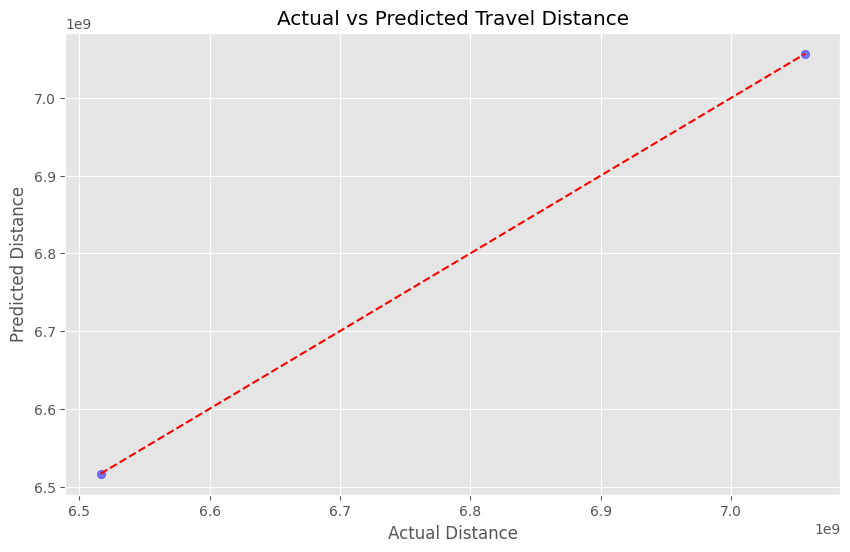

Average travel distance when no one stays at home: nan miles


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed
from time import time

# Load data (assuming 'Trips_Full_Data.csv' is the file you're working with)
df = pd.read_csv('Trips_Full_Data.csv')

# Clean data
df.columns = df.columns.str.strip()  # Strip any extra spaces in column names
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle invalid dates
df = df.dropna(subset=['Date'])  # Drop rows with invalid dates

# Handle missing values in numerical columns
df['Population Staying at Home'] = df['Population Staying at Home'].fillna(df['Population Staying at Home'].mean())

# Check the columns and ensure the correct column names
print(df.columns)

# Categorization
# Count unique values in 'Week of Date' column
unique_weeks = df['Week of Date'].nunique()
print(f"Unique weeks: {unique_weeks}")

# Group average population staying at home per week
avg_population_staying_home = df.groupby('Week of Date')['Population Staying at Home'].mean()
print("\nAverage Population Staying at Home per Week:")
print(avg_population_staying_home)

# Parallel Processing: Define a function to process and calculate distance using parallelism
def calculate_distance(row):
    # Use correct column names for distance calculation
    return row['Trips 10-25 Miles'] * 25 + row['Trips 50-100 Miles'] * 75  # Dummy calculation for distance

# Using parallel computing with joblib to speed up distance calculation
start_time = time()
distances = Parallel(n_jobs=-1)(delayed(calculate_distance)(row) for index, row in df.iterrows())
df['Calculated Distance'] = distances
end_time = time()
print(f"Time taken with Parallel Processing: {end_time - start_time:.4f} seconds")

# Sequential Processing: Without Parallel Computing
start_time_seq = time()
df['Calculated Distance Seq'] = df.apply(calculate_distance, axis=1)
end_time_seq = time()
print(f"Time taken with Sequential Processing: {end_time_seq - start_time_seq:.4f} seconds")

# Model Fitting (using Linear Regression for demonstration)
# We'll fit a regression model to predict travel distance based on the features

# Prepare features and target
X = df[['Population Staying at Home', 'Trips 10-25 Miles', 'Trips 50-100 Miles']]  # Example features
y = df['Calculated Distance']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the Model: {mse:.4f}")

# Plotting Results
plt.figure(figsize=(10, 6))

# Plot the actual vs predicted travel distances
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Distance')
plt.ylabel('Predicted Distance')
plt.title('Actual vs Predicted Travel Distance')
plt.show()

# Extrapolate findings: Estimate how far people travel when they don't stay home
# For simplicity, assume we use the calculated distances for estimation:
no_home_population = df[df['Population Staying at Home'] == 0]  # Filter for rows where no one stays home
average_travel_distance = no_home_population['Calculated Distance'].mean()
print(f"Average travel distance when no one stays at home: {average_travel_distance:.2f} miles")

